# cdasws Graph Example Jupyter Notebook
This [Jupyter notebook](https://jupyter.org) demonstrates using the [cdasws](https://pypi.org/project/cdasws) Python package to access a [CDAWlib](https://spdf.gsfc.nasa.gov/CDAWlib.html) plot of data from [cdaweb](https://cdaweb.gsfc.nasa.gov).  This notebook contains the following sections:

1. [Prerequisites](#Prerequisites)
2. [Setup](#Setup)
3. [Get Graph of Data](#Get-Graph-of-Data)
4. [Display Graph](#Display-Graph)
5. [Advanced Options](#Advanced-Options)
6. [Additional Capabilities](#Additional-Capabilities)
7. [Additional Documentation](#Additional-Documentation)

**Notes**: 
1. This example only depends upon pure Python modules and does not require modules that depend upon non-Python code (such as spacepy and pycdf).

## Prerequisites
Install the prerequisite software from the [Python Package Index](https://pypi.org/) if it is not already installed.

In [6]:
#%pip install -U cdasws
#%pip install -U matplotlib

## Setup
Execute some preliminary code that is necessary before the code that follows.

In [7]:
from cdasws import CdasWs
from cdasws.datarequest import GraphOptions, ImageFormat, Overplot, TextFormat
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
import urllib
cdas = CdasWs()

## Get Graph of Data
The following code demonstrates how to access [CDAWlib](https://spdf.gsfc.nasa.gov/CDAWlib.html) plots of magnetic field measurements from the 
ACE [AC_H1_MFI](https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H1_MFI).

In [8]:
status, result = cdas.get_graph('AC_H1_MFI', ['Magnitude'],
                     '2009-06-01T00:00:00Z', '2009-06-02T00:10:00Z')

## Display Graph
The following code demonstrates how to display the CDAWlib plot.

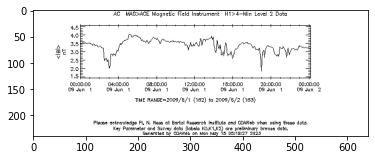

In [9]:
if status == 200:
    graph = urllib.request.urlopen(result['FileDescription'][0]['Name'])
    img = Image.open(graph)
    plt.imshow(img)
    plt.show()
else:
    print('Error getting graph: ', status)

## Advanced Options
The above example was intentionally simple and accepted default values where possible.  The following code demonstrates some of the additional options.

In [10]:
result = cdas.get_graph('AC_H1_MFI', ['Magnitude', 'BGSEc'],
                        '2009-06-01T00:00:00Z', '2009-06-02T00:10:00Z',
                        GraphOptions(coarse_noise_filter=True,
                                    #x_axis_width_factor=4,
                                    y_axis_height_factor=2,
                                    combine=True,
                                    overplot=Overplot.VECTOR_COMPONENTS),
                       [ImageFormat.PDF])[1]
print(result['FileDescription'][0]['Name'])

https://cdaweb.gsfc.nasa.gov/tmp/wsYdtNnS/AC_H1_MFI__000.pdf


## Additional Capabilities
The `cdasws` package has many additional capabilities such as the following:

- Producing the graph as a [PostScript](https://en.wikipedia.org/wiki/PostScript) (PS) or [Portable Document Format](https://en.wikipedia.org/wiki/PDF) (PDF) file (see [ImageFormat](/WebServices/REST/py/cdasws/datarequest.html#cdasws.datarequest.ImageFormat)).
- Producing a [CDF](https://cdf.gsfc.nasa.gov) file containing a subset/superset of the data (see [get_data_file()](/WebServices/REST/py/cdasws/#cdasws.CdasWs.get_data_file)).
- Producing a textual (listing) representation of the data (see [get_text()](/WebServices/REST/py/cdasws/#cdasws.CdasWs.get_text)).
- Producing a Comma Separated Value (CSV) representation of the data (see [TextFormat](/WebServices/REST/py/cdasws/datarequest.html#cdasws.datarequest.TextFormat)).
- Producing an audio representation of the data (see [get_audio()](/WebServices/REST/py/cdasws/#cdasws.CdasWs.get_audio)).
- Computing [uniformly spaced binned data](https://cdaweb.gsfc.nasa.gov/CDAWeb_Binning_readme.html) for scalar/vector/spectrogram data (see the **binData** keyword parameter).
- Others.


## Additional Documentation

View the [cdasws API](https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/) for additional functions.  Additional [notebook examples](https://cdaweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples) are also available.